Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

# Chapter 5 - Technical Analysis and Building Interactive Dashboards

## 5.1 Calculating the most popular technical indicators

### How to do it...

1. Import the libraries:

In [4]:
import pandas as pd 
import yfinance as yf
import talib

2. Download IBM's stock prices from 2020:

In [9]:
df = yf.download("NVDA", 
                 start="2024-01-01", 
                 end="2024-12-31",
                 progress=False,
                 auto_adjust=True)
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02 00:00:00+00:00,48.157665,49.284422,47.584790,49.233435,411254000
2024-01-03 00:00:00+00:00,47.558792,48.173658,47.309845,47.474811,320896000
2024-01-04 00:00:00+00:00,47.987705,48.489596,47.497809,47.756752,306535000
2024-01-05 00:00:00+00:00,49.086464,49.536368,48.295633,48.451602,415039000
2024-01-08 00:00:00+00:00,52.241787,52.263785,49.468384,49.501378,642510000
...,...,...,...,...,...
2024-10-17 00:00:00+00:00,136.929993,140.889999,136.869995,139.339996,306435900
2024-10-18 00:00:00+00:00,138.000000,138.899994,137.279999,138.669998,176090200


3. Calculate and plot the Simple Moving Average:

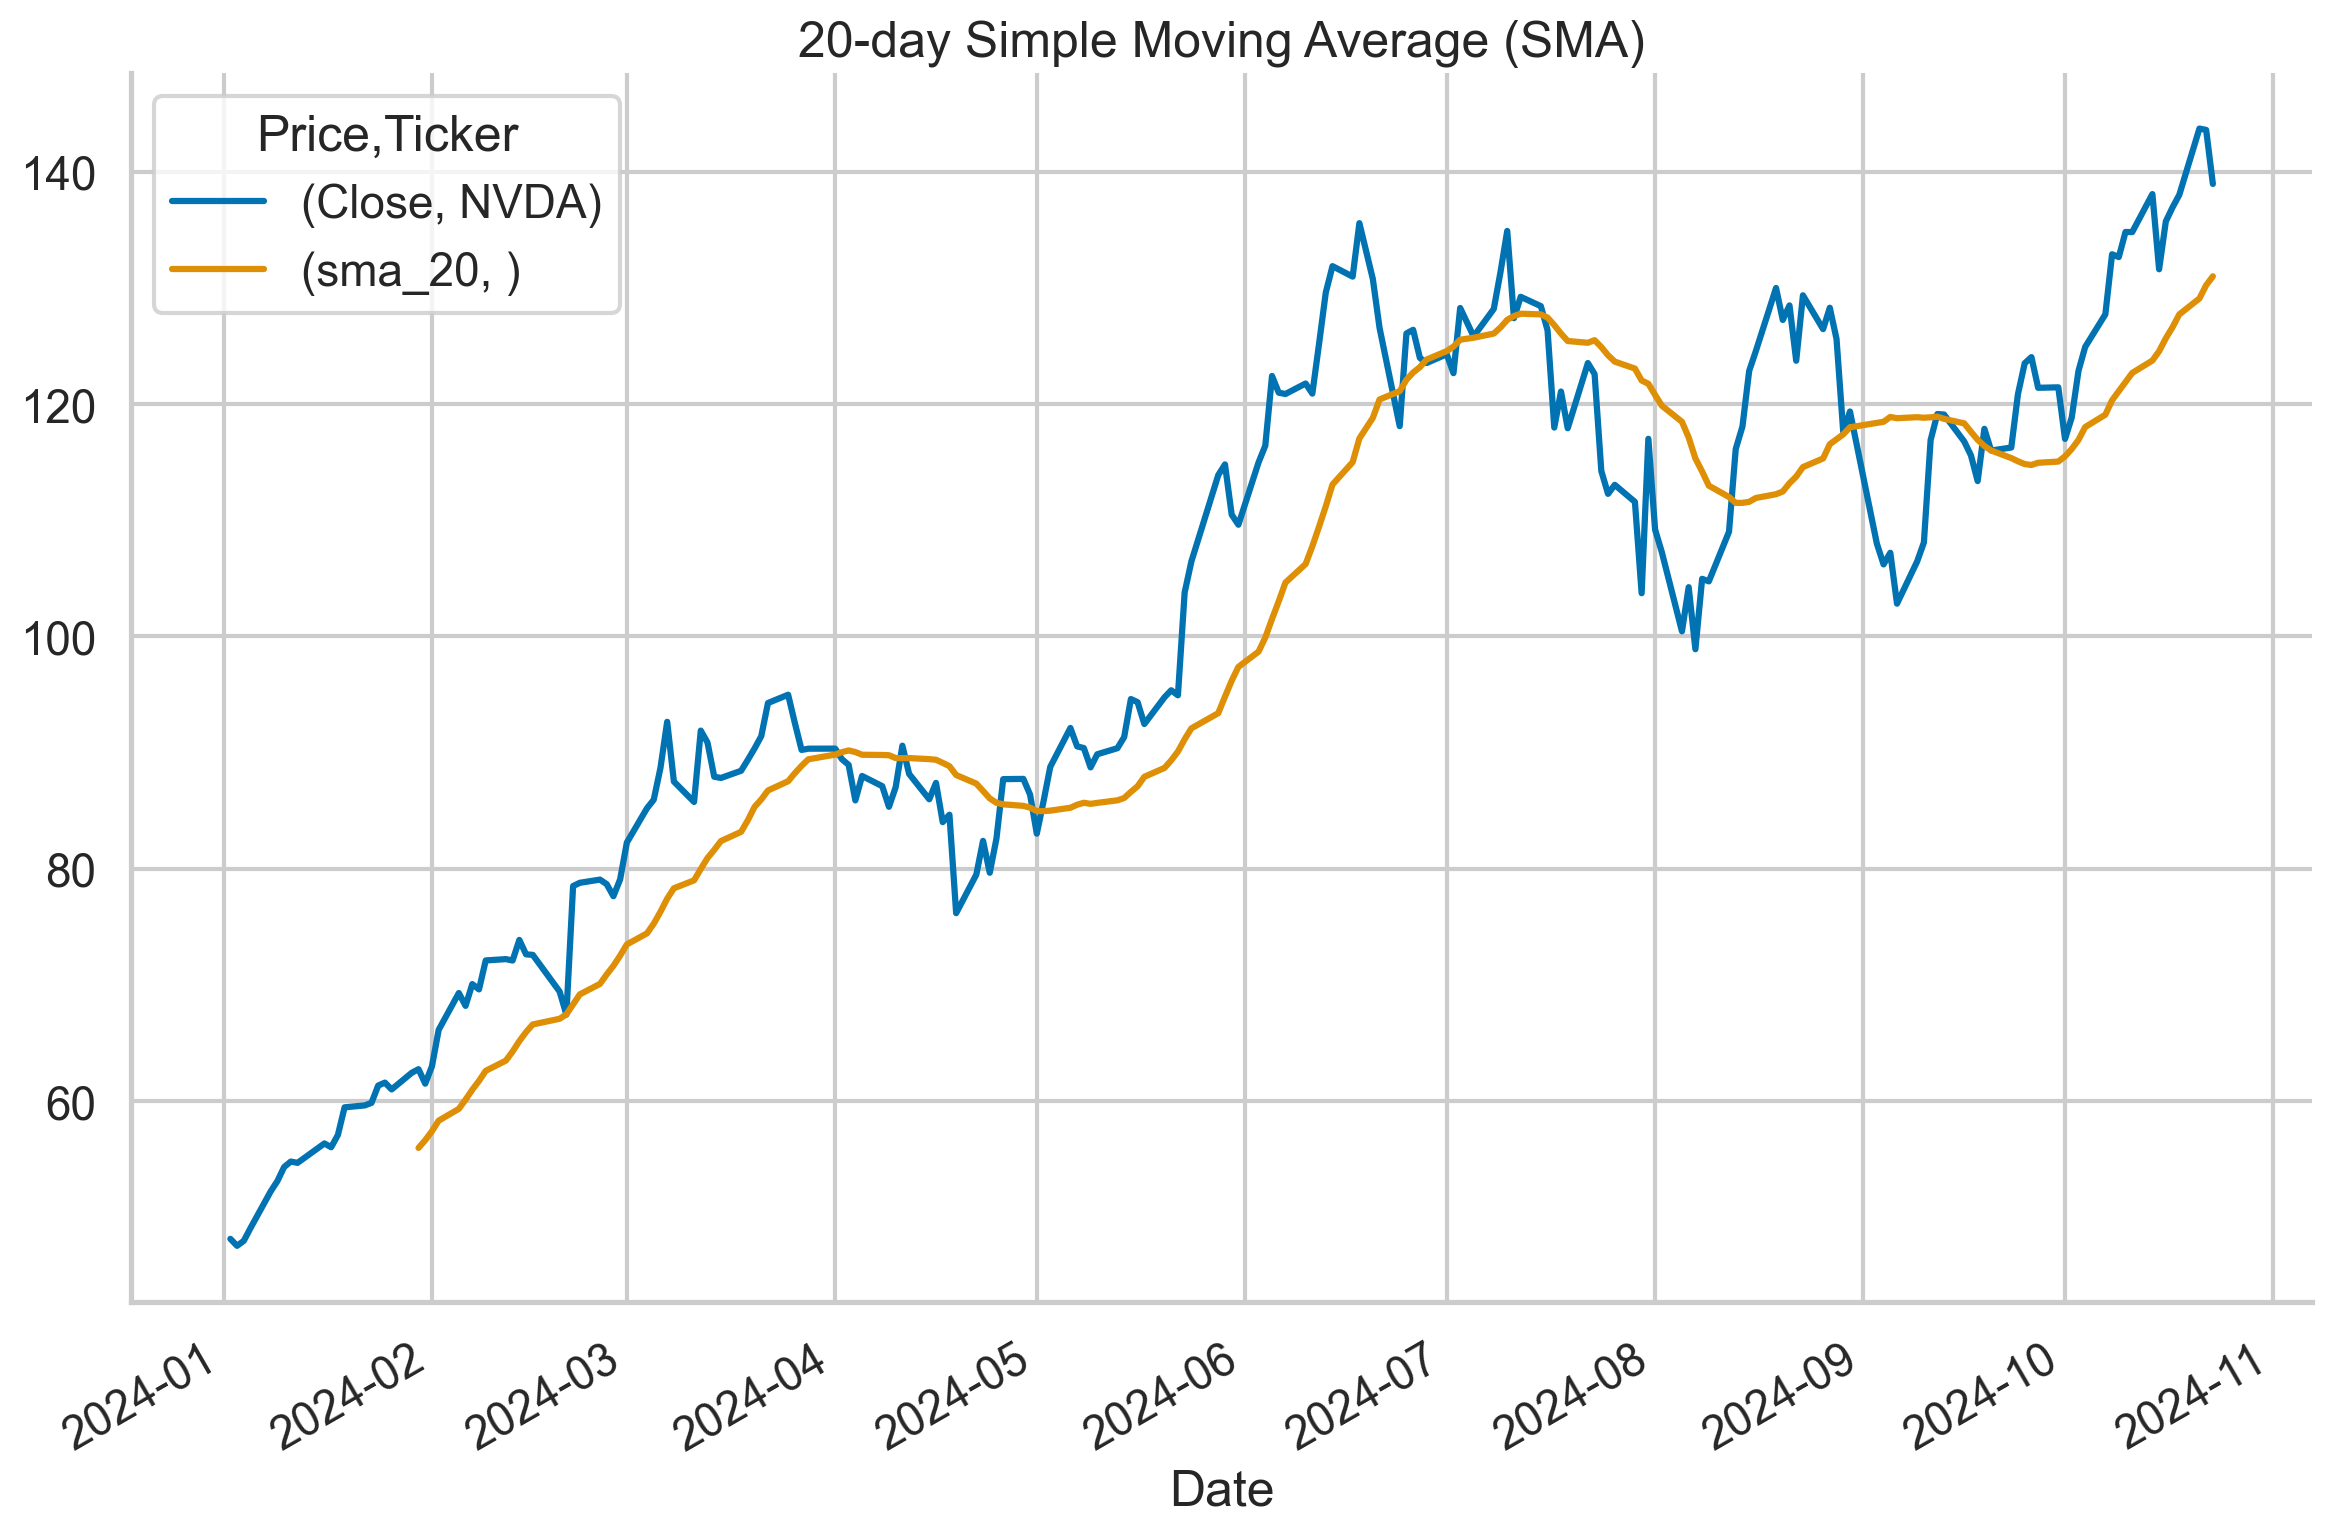

In [10]:
df["sma_20"] = talib.SMA(df["Close"].values.flatten(), timeperiod=20)

# Plotting
df[["Close", "sma_20"]].plot(title="20-day Simple Moving Average (SMA)")
sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

4. Calculate and plot the Bollinger bands:

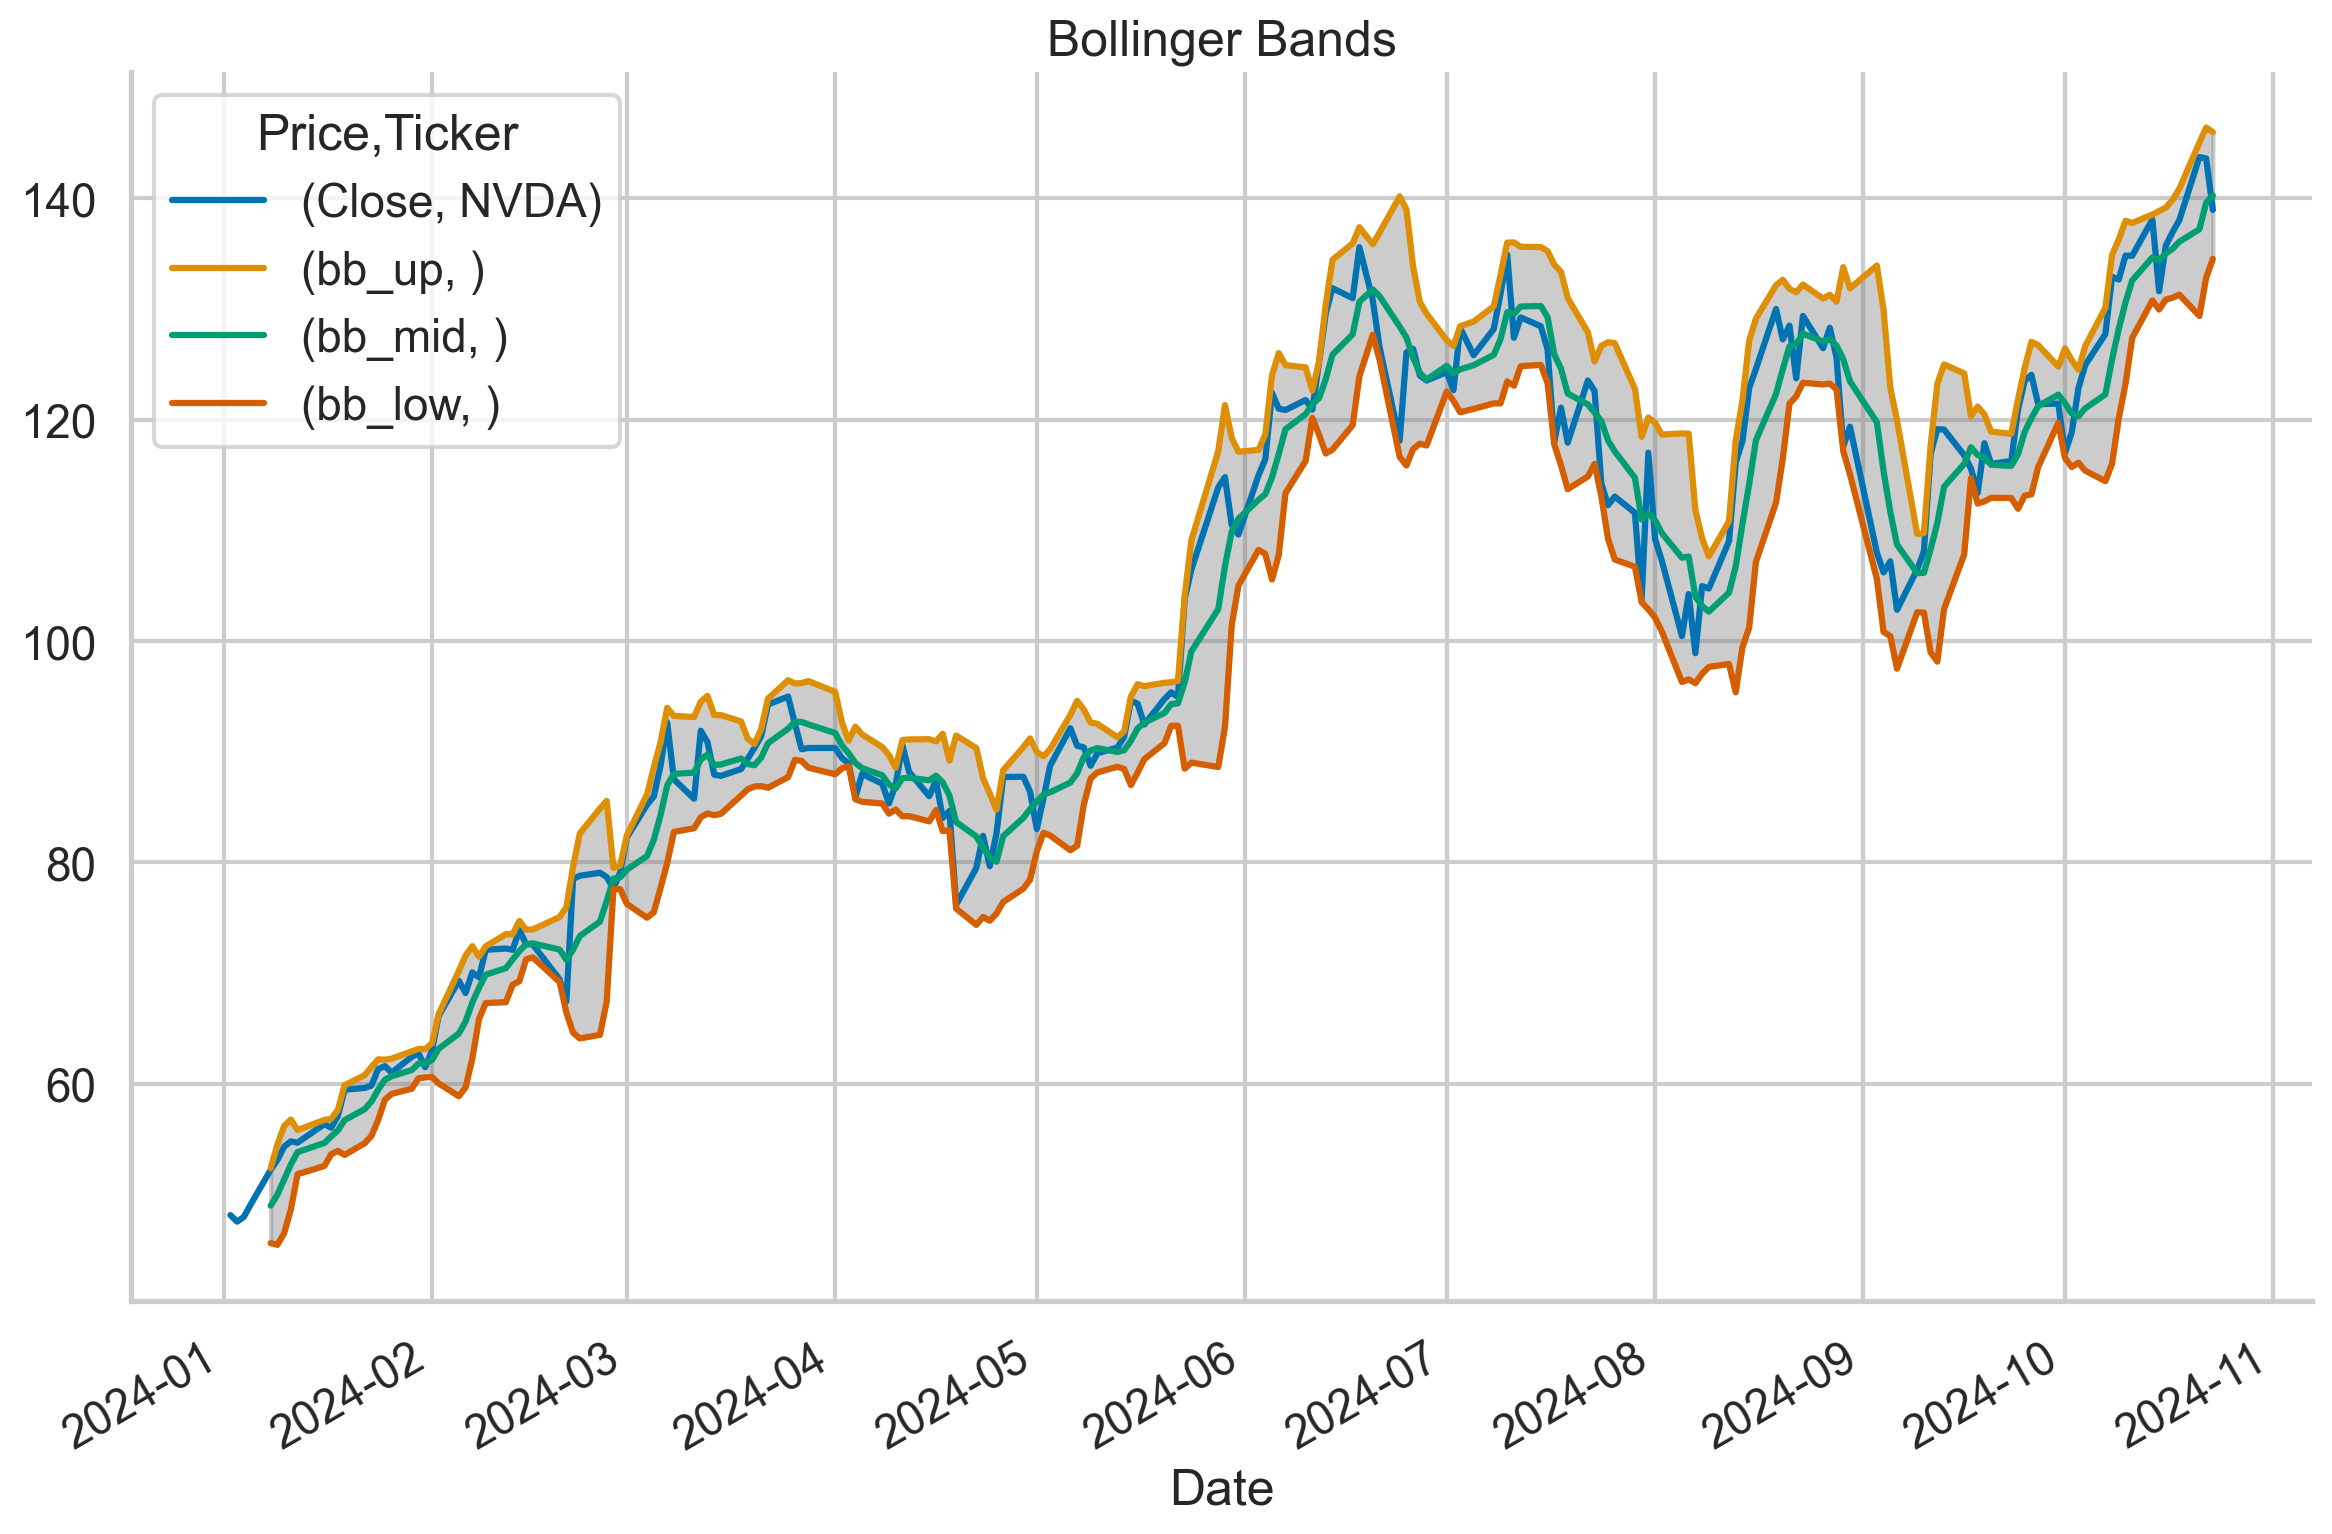

In [11]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"].values.flatten())

fig, ax = plt.subplots()


df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]].plot(ax=ax, title="Bollinger Bands")


ax.fill_between(df.index, df["bb_low"], df["bb_up"], 
                color="gray", 
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

5. Calculate and plot the RSI:

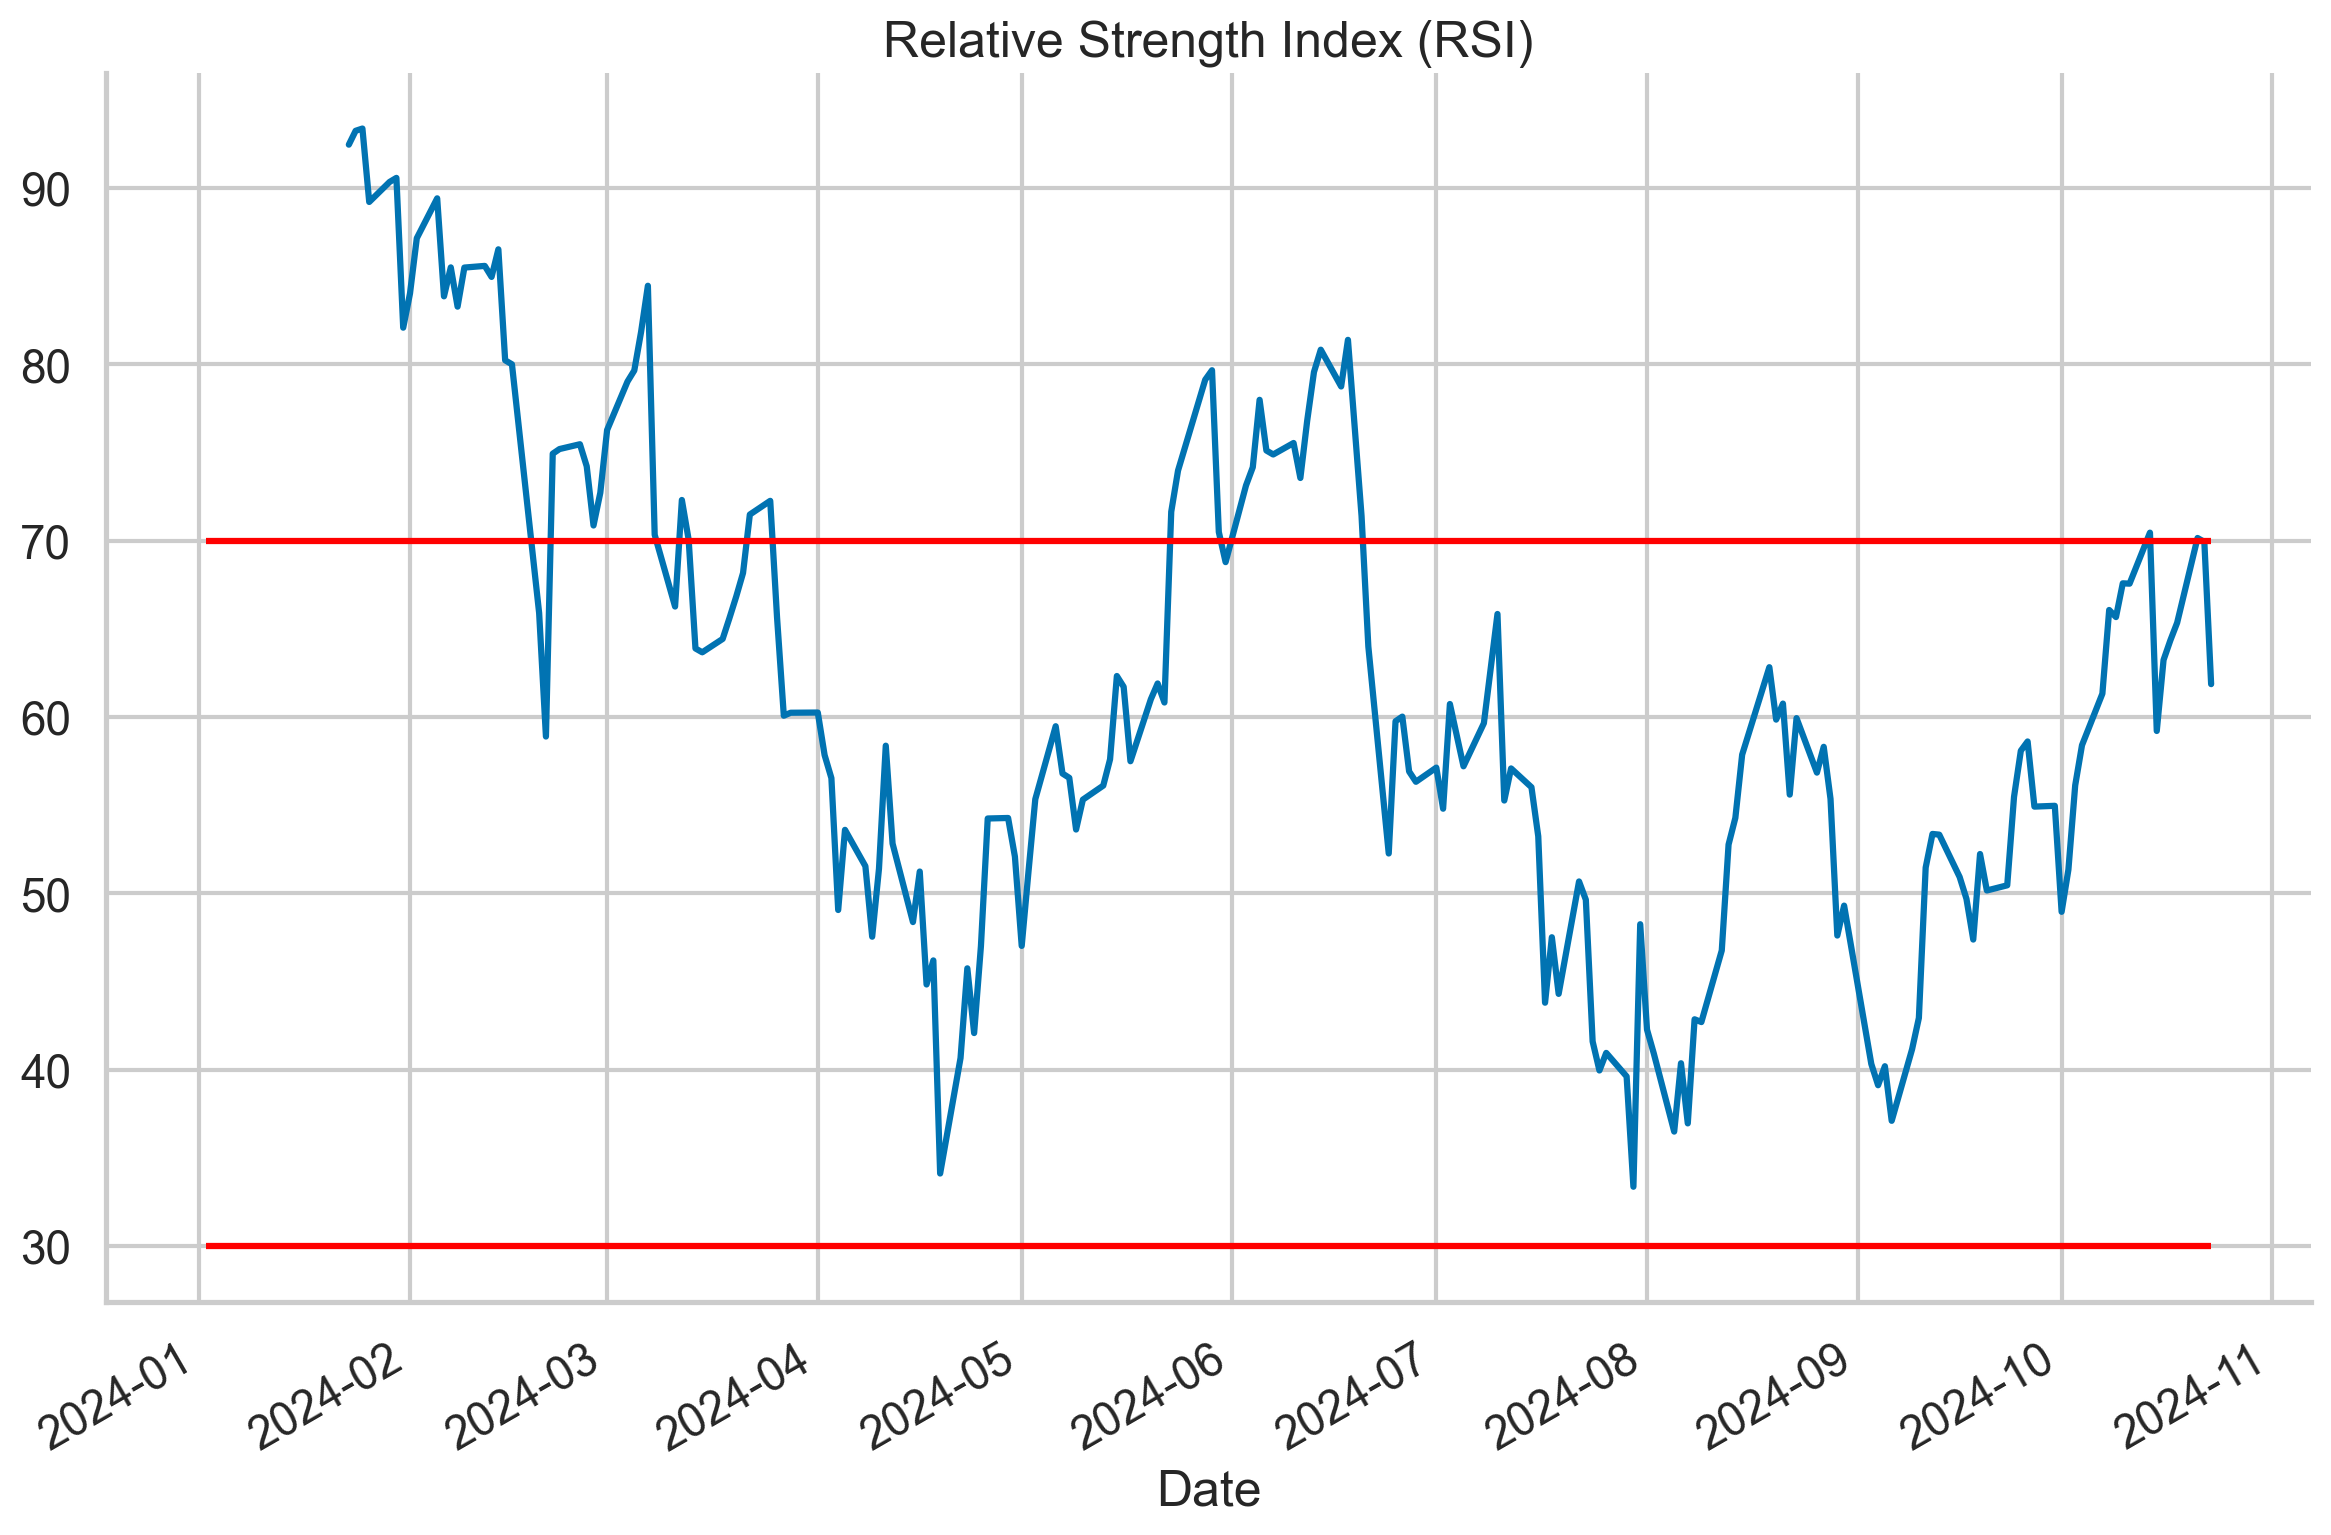

In [12]:
df["rsi"] = talib.RSI(df["Close"].values.flatten())

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, 
               title="Relative Strength Index (RSI)")
ax.hlines(y=30, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

6. Calculate and plot the MACD:

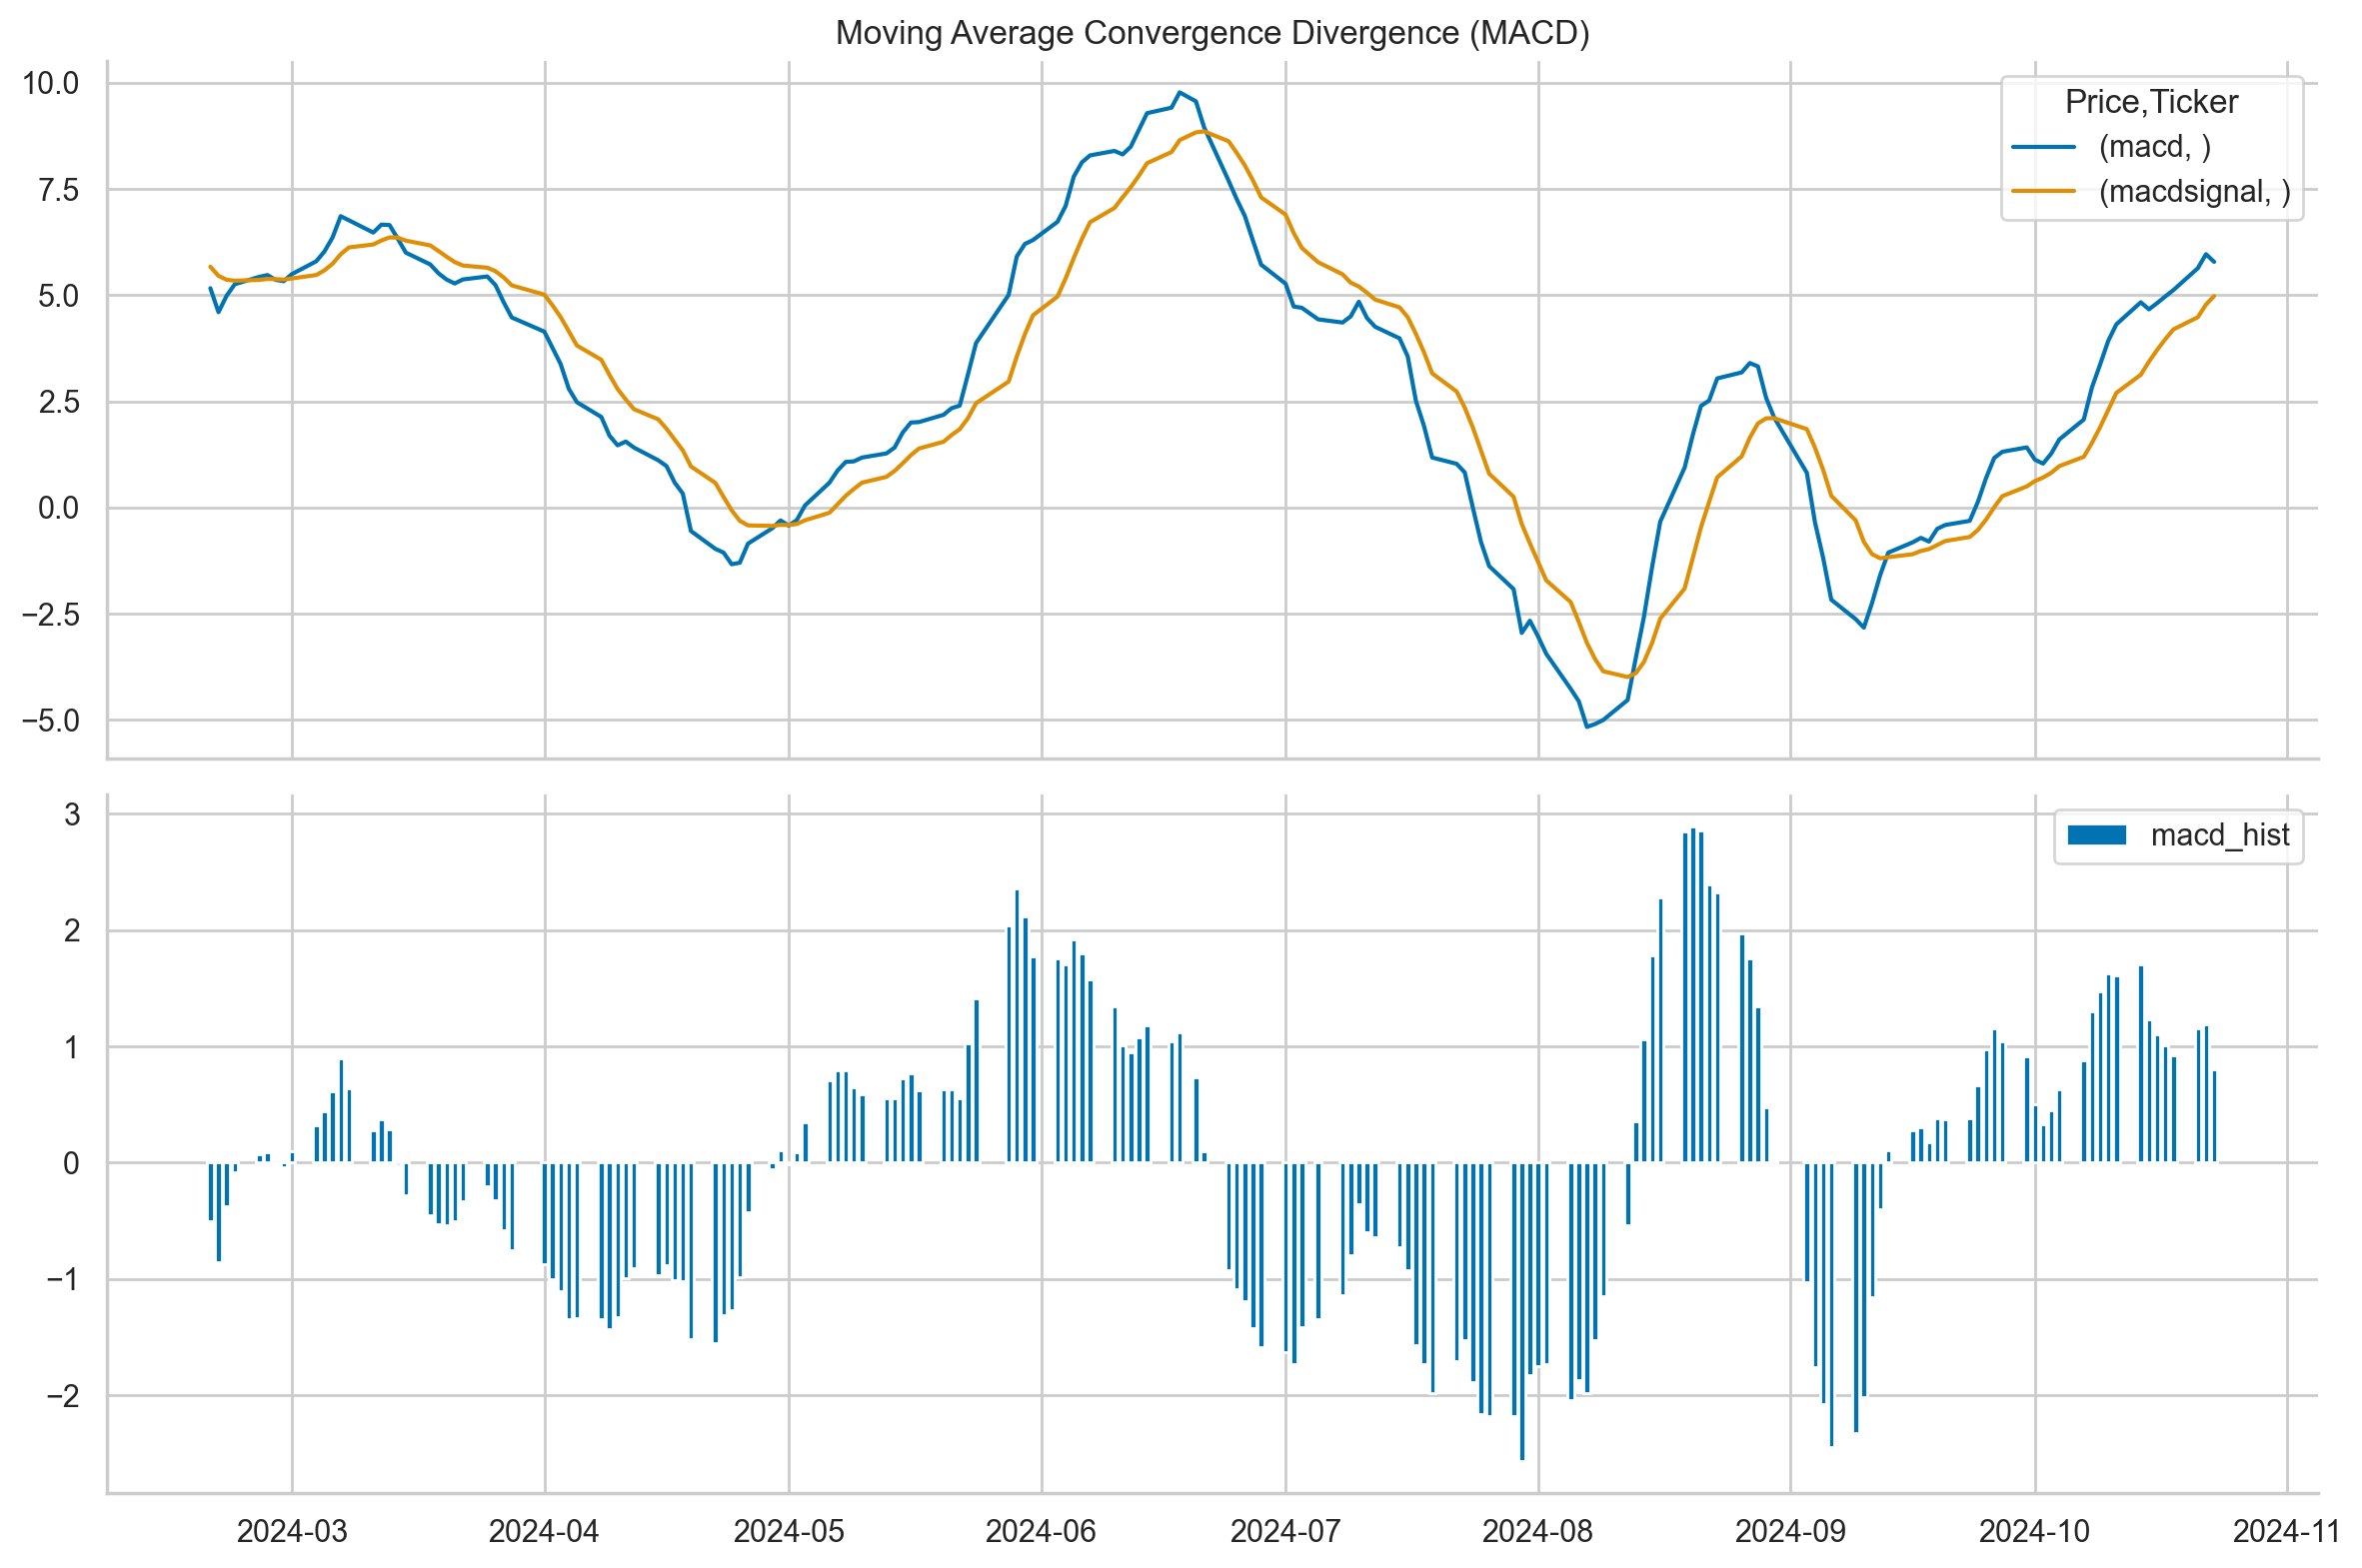

In [13]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(df["Close"].values.flatten(), fastperiod=12, slowperiod=26, signalperiod=9)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)


    df[["macd", "macdsignal"]].plot(ax=ax[0],title="Moving Average Convergence Divergence (MACD)")

    ax[1].bar(df.index, df["macdhist"].values.flatten(), label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

1. Import the libraries:

In [14]:
from ta import add_all_ta_features


2. Discard the previously calculated indicators and keep only the required columns:

In [15]:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

df

Price,Open,High,Low,Close,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02 00:00:00+00:00,49.233435,49.284422,47.584790,48.157665,411254000
2024-01-03 00:00:00+00:00,47.474811,48.173658,47.309845,47.558792,320896000
2024-01-04 00:00:00+00:00,47.756752,48.489596,47.497809,47.987705,306535000
2024-01-05 00:00:00+00:00,48.451602,49.536368,48.295633,49.086464,415039000
2024-01-08 00:00:00+00:00,49.501378,52.263785,49.468384,52.241787,642510000
...,...,...,...,...,...
2024-10-17 00:00:00+00:00,139.339996,140.889999,136.869995,136.929993,306435900
2024-10-18 00:00:00+00:00,138.669998,138.899994,137.279999,138.000000,176090200


3. Calculate all the technical indicators available in the `ta` library:

In [16]:

df = add_all_ta_features(df, open="Open", high="High", 
                         low="Low", close="Close", 
                         volume="Volume")

ValueError: Data must be 1-dimensional, got ndarray of shape (205, 1) instead

In [ ]:
df.shape

In [ ]:
df.columns

## 5.2 Downloading the technical indicators

### How to do it...

1. Import the libraries:

In [ ]:
from alpha_vantage.techindicators import TechIndicators

2. Instantiate the `TechIndicators` class and authenticate:

In [ ]:
ta_api = TechIndicators(key="YOUR_KEY_HERE", 
                        output_format="pandas")

3. Download the RSI for IBM's stock:

In [ ]:
rsi_df, rsi_meta = ta_api.get_rsi(symbol="IBM", 
                                  time_period=14)

4. Plot the downloaded RSI:

In [ ]:
fig, ax = plt.subplots()
rsi_df.plot(ax=ax, 
            title="RSI downloaded from Alpha Vantage")
ax.hlines(y=30, 
          xmin=rsi_df.index.min(), 
          xmax=rsi_df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=rsi_df.index.min(), 
          xmax=rsi_df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_5", dpi=200)

In [ ]:
rsi_df

5. Explore the metadata object:

In [ ]:
rsi_meta

### There's more

1. Import the libraries:

In [ ]:
import intrinio_sdk as intrinio
import pandas as pd

2. Authenticate using the personal API key and select the API:

In [ ]:
intrinio.ApiClient().set_api_key("YOUR_KEY_HERE") 
security_api = intrinio.SecurityApi()

3. Request the MACD for IBM's stock from 2020:

In [ ]:
r = security_api.get_security_price_technicals_macd(
    identifier="IBM", 
    fast_period=12, 
    slow_period=26, 
    signal_period=9, 
    price_key="close", 
    start_date="2020-01-01", 
    end_date="2020-12-31",
    page_size=500
)

4. Convert the request's output into a `pandas` DataFrame:

In [ ]:
macd_df = (
    pd.DataFrame(r.technicals_dict)
    .sort_values("date_time")
    .set_index("date_time")
)
macd_df.index = pd.to_datetime(macd_df.index).date
macd_df

5. Plot the MACD:

In [ ]:
with sns.plotting_context("notebook"):
    
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        macd_df[["macd_line", "signal_line"]]
        .plot(ax=ax[0], 
              title="MACD downloaded from Intrinio")
    )
    ax[1].bar(df.index, macd_df["macd_histogram"].values, 
              label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_6", dpi=200)

## 5.3 Recognizing candlestick patterns

### How to do it...

1. Import the libraries:

In [ ]:
import pandas as pd 
import yfinance as yf
import talib
import mplfinance as mpf

2. Download Bitcoin's hourly prices from the last 3 months:

In [ ]:
df = yf.download("BTC-USD", 
                 period="9mo",
                 interval="1h",
                 progress=False)
df

3. Identify the "Three Line Strike" pattern:

In [ ]:
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)

4. Locate and plot the bearish pattern:

In [ ]:
df[df["3_line_strike"] == -100].head().round(2)

In [ ]:
mpf.plot(df["2021-07-16 05:00:00":"2021-07-16 16:00:00"], 
         type="candle")

5. Locate and plot the bullish pattern:

In [ ]:
df[df["3_line_strike"] == 100].head().round(2)

In [ ]:
mpf.plot(df["2021-07-10 10:00:00":"2021-07-10 23:00:00"], 
         type="candle")

### There's more

1. Get all available pattern names:

In [ ]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

2. Iterate over the list of patterns and try identifying them all:

In [ ]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"], 
                                        df["Low"], df["Close"])

3. Inspect the summary statistics of the patterns:

In [ ]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

4. Locate and plot the "Evening Star" pattern:

In [ ]:
df[df["CDLEVENINGSTAR"]  == -100].head()

In [ ]:
mpf.plot(df["2021-09-21 12:00:00":"2021-09-22 03:00:00"], type="candle")